<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: To execute the Python code in the code cell below, click on the cell to select it and press <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>
<hr/>

# Notwendige Imports für dieses Notebook

In [2]:
try:
    import plotly.express as px
except ImportError as e:
    !pip install "plotly>=5.0"

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

import plotly.io as pio 
pio.renderers.default = 'notebook'


from os.path import exists
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# Laden des Datensatzes

In [ ]:
def load_crimes():    
    local = "crime.csv.zip"
    if exists(local):
        print ("Read from local file")
        return pd.read_csv(local, compression='zip')
    else:
        if exists("crime.csv"):
            return pd.read_csv("crime.csv")
        print ("Read from hu-box")        
        return pd.read_csv('https://box.hu-berlin.de/f/d0c59bb99af24dbf9c81/?dl=1', compression='zip')    

df = load_crimes()

# fill missing values
df.SHOOTING = df.SHOOTING.fillna('N')

# Replace -1 values in Lat/Long with Nan
df.Lat = df.Lat.replace(-1, np.nan)
df.Long = df.Long.replace(-1, np.nan)
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

df = df.convert_dtypes()
df.head()


319073

In [4]:
# List the data types of each column
df.dtypes

INCIDENT_NUMBER        string[python]
OFFENSE_CODE                    Int64
OFFENSE_CODE_GROUP     string[python]
OFFENSE_DESCRIPTION    string[python]
DISTRICT               string[python]
REPORTING_AREA         string[python]
SHOOTING               string[python]
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            Int64
MONTH                           Int64
DAY_OF_WEEK            string[python]
HOUR                            Int64
UCR_PART               string[python]
STREET                 string[python]
Lat                           Float64
Long                          Float64
Location               string[python]
dtype: object

# Show the Crimes on OpenStreetMap

In [5]:
# Drop NAN and sample to 10k samples to avoid excessive memory usage
data = df.dropna(subset=['Lat', 'Long', 'DISTRICT']).sample(n=10_000)

fig = px.scatter_map(
    data,
    lat='Lat',
    lon='Long',
    color='DISTRICT',
    zoom=10,
)

fig.update_layout(
    font_family='serif',
    title_font_size=24,
    title_font_weight='bold',
    width=1000,
    height=500,
    mapbox_style=None,
    title=dict(
        text="Crimes by District",
        font=dict(size=24)),
        title_subtitle=dict(
        text="Boston is divided into 12 Discricts",
        font=dict(size=18))
)

fig.show()

# Informationen

In [6]:
df.describe()

OFFENSE_CODE               OCCURRED_ON_DATE         YEAR     MONTH  \
count      319073.0                         319073     319073.0  319073.0   
mean    2317.546956  2017-01-25 11:54:00.922723072  2016.560586  6.609719   
min           111.0            2015-06-15 00:00:00       2015.0       1.0   
25%          1001.0            2016-04-12 01:23:00       2016.0       4.0   
50%          2907.0            2017-01-28 03:17:00       2017.0       7.0   
75%          3201.0            2017-11-05 18:14:00       2017.0       9.0   
max          3831.0            2018-09-03 21:25:00       2018.0      12.0   
std     1185.285543                            NaN     0.996344  3.273691   

            HOUR        Lat       Long  
count   319073.0   298329.0   298329.0  
mean   13.118205  42.322298  -71.08285  
min          0.0  42.232413 -71.178674  
25%          9.0  42.297555 -71.097193  
50%         14.0   42.32561 -71.077562  
75%         18.0  42.348624 -71.062563  
max         23.0  42.395042 -70.963676  
std     6.294205   0.031881   0.029771

In [7]:
df.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    2
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18177
Long                    18177
Location                18194
dtype: int64

# Selektion / Filter

In [8]:
df[(df.UCR_PART == "Part One")].INCIDENT_NUMBER.count()

np.int64(61629)

# Gruppierungen und Aggregation

In [9]:
df.groupby("YEAR").INCIDENT_NUMBER.count()

YEAR
2015     53388
2016     99114
2017    100886
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

## Alternative

In [10]:
df.groupby("YEAR")[["INCIDENT_NUMBER"]].count()


INCIDENT_NUMBER
YEAR                 
2015            53388
2016            99114
2017           100886
2018            65685

## Sorting

In [11]:
df.sort_values(by="YEAR", ascending=False).head()

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0           I182070945           619            Larceny   
319042   I110611058-00          3125    Warrant Arrests   
31          I182070900          2629         Harassment   
30          I182070901          2907         Violations   
29          I182070903          2900              Other   

                        OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                        LARCENY ALL OTHERS      D14            808        N   
319042                       WARRANT ARREST       A1                       N   
31                               HARASSMENT       B3            464        N   
30          VAL - OPERATING AFTER REV/SUSP.       B3            428        N   
29      VAL - VIOLATION OF AUTO LAW - OTHER       B3            463        N   

          OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0      2018-09-02 13:00:00  2018      9      Sunday    13    Part One   
319042 2018-08-29 17:00:00  2018      8   Wednesday    17  Part Three   
31     2018-09-03 18:17:00  2018      9      Monday    18    Part Two   
30     2018-09-03 18:41:00  2018      9      Monday    18    Part Two   
29     2018-09-03 18:55:00  2018      9      Monday    18    Part Two   

                STREET        Lat       Long                     Location  
0           LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  
319042    CAMBRIDGE ST       <NA>       <NA>     (0.00000000, 0.00000000)  
31      HANSBOROUGH ST  42.288104 -71.091533  (42.28810362, -71.09153335)  
30        CLARKWOOD ST  42.280137 -71.090798  (42.28013735, -71.09079826)  
29       BLUE HILL AVE  42.295904 -71.087733  (42.29590385, -71.08773294)

### Documentation: https://pandas.pydata.org

# Plotting with Seaborn

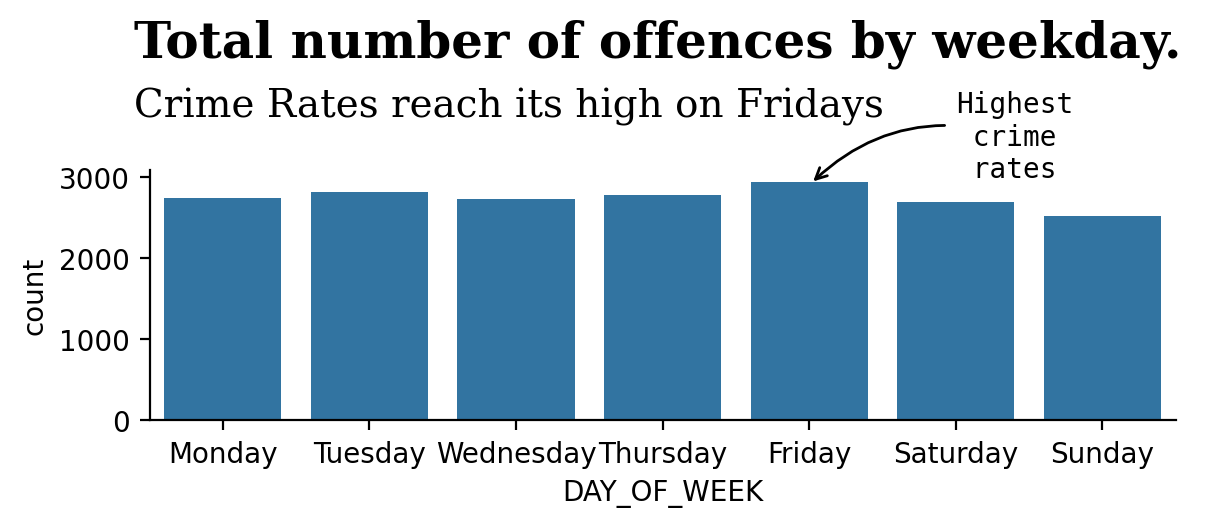

In [12]:
# First filter some data
data = df[(df.UCR_PART == 'Part One')  & (df.YEAR == 2016)]

# Plot some data
g = sns.catplot(
    x='DAY_OF_WEEK',
    kind='count',
    height=2,
    aspect=3.0,
    data=data,
    order=["Monday", "Tuesday", "Wednesday", 
           "Thursday", "Friday", "Saturday", "Sunday"])

# add title
g.fig.text(0.12, 1.2, 'Total number of offences by weekday.', 
         fontsize=18, fontweight='bold', fontfamily='serif')
g.fig.text(0.12, 1.05, 'Crime Rates reach its high on Fridays', 
         fontsize=14, fontweight='light', fontfamily='serif');

# annotate plot
plt.annotate('Highest\n crime\n rates', xy=(4, 2900), xytext=(5, 3000),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=.3"), 
             fontsize=10,fontfamily='monospace', ha='left');

plt.show()

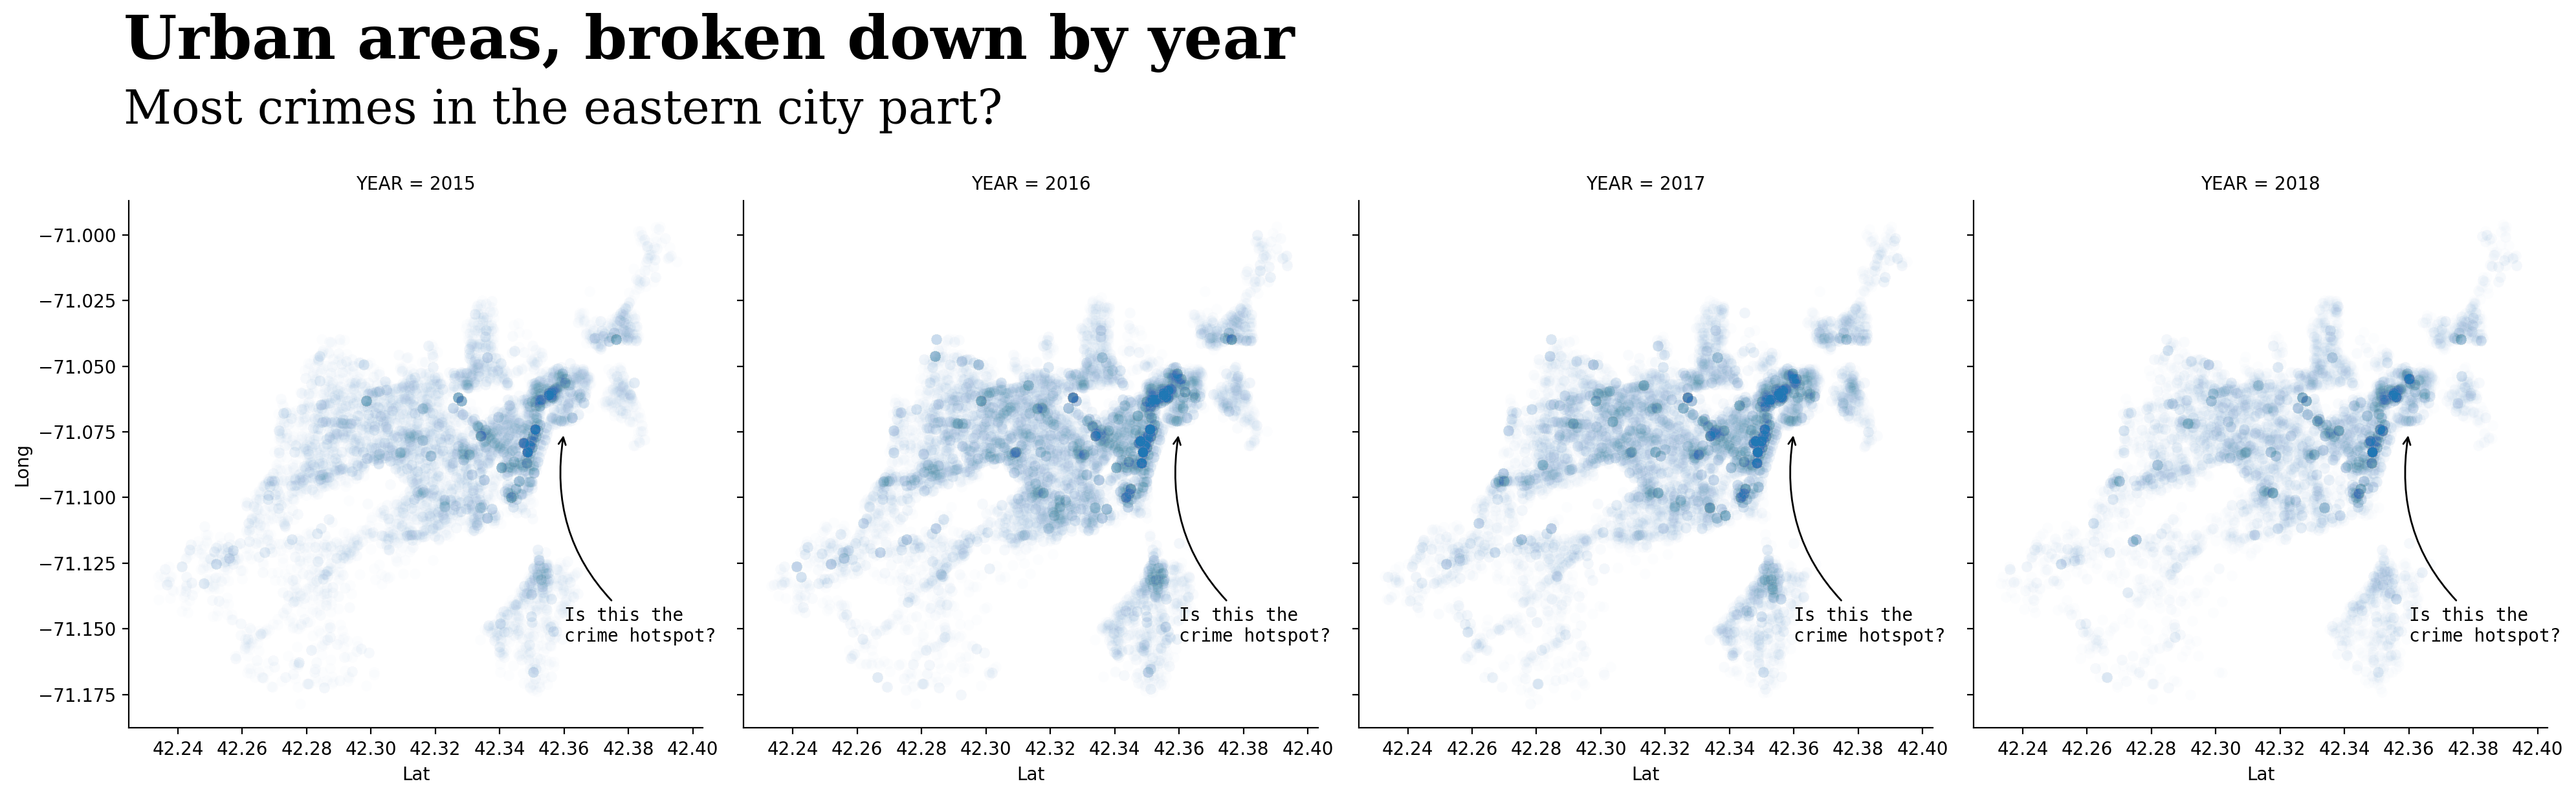

In [13]:
# First filter some data
data = df[(df.UCR_PART == 'Part One')].dropna(subset=['Lat', 'Long'])

# Plot some data
g = sns.relplot(
    x='Lat',
    y='Long',   
    col='YEAR',
    alpha=0.01,
    data=data
)

# add title
g.fig.text(0.05, 1.15, 'Urban areas, broken down by year', 
         fontsize=34, fontweight='bold', fontfamily='serif')
g.fig.text(0.05, 1.05, 'Most crimes in the eastern city part?', 
         fontsize=26, fontweight='light', fontfamily='serif');

# annotate plot
for axes in g.axes:
    for ax in axes:
        ax.annotate('Is this the\ncrime hotspot?', xy=(42.36, -71.075), xytext=(42.36, -71.155),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=-.3"), 
             fontsize=10,fontfamily='monospace', ha='left');


sns.despine()
plt.show()

### Documentation: https://seaborn.pydata.org

<hr>

# Your Solutions - Submit via Moodle

<hr/>


<div class="alert alert-block alert-success" style="margin-top: 20px">

<h1>1. Classify Columns</h1>

<h2>a) Classify the data types of each column</h2>
<ul>
<li><strong>Numerical</strong>
<ul>
<li>Continuous or Discrete</li></ul>
</li>
<li><strong>Categorical</strong>
<ul>
<li>Nominal or Ordinal</li></ul>
</li>
</ul>

<b>If a column is discrete or ordinal:
State the reason for your decision</b>

</div>

In [14]:
# Answer / Code / etc
"""
Incident_number     nominal (string and order has no meaning)
offense_code        nominal (value is just used as a reference for the crime (could also be a name))
offense_code_group  nominal (name for the code --> no order)
offense_description nominal (just a description (no order, cant be counted or measured))
district            nominal (string and not clear if order is meaningful)
reporting_area      continuous (you could take the average and the value would make sense (can be interpolated) However: there exists a smallest unit of measurement and a finit amount of precision so every value will be discretized)
shooting            nominal (boolean value (no order))
occured_on_date     contiuous (can be measured (clock), average would make sense (2,5 days = 60h), There is also the same argument for discrete again :))
year                continuous (2018,5 = 2018 + 6 months (can be interpolated))
month               discrete (months can have different sizes --> e.g. 1/2 moth is not defined --> cannot be interpolated; not ordinal as you can count them and it has a meaning 3m > 4mo; 3mo + 5mo = 8mo)
day_of_week         ordinal (order (mo, tue, wed, ...) but mon + wed = ? --> categorical nut numerical)
hour                continuous (number; order has meaning; Addition works; can be interpolated (0,5h = 30min, ...))
ucr_part            ordinal (has order but addition does not make sense --> not discrete)
street              nominal (no order just category)
lat                 continous (number; order; can be interpolated (up to the point of maximum precision))            
long                continous (number; order; can be interpolated (up to the point of maximum precision))  
location            continous (tuple of numbers; meaningful orders can be defined; can be interpolated on 2d plane)




INCIDENT_NUMBER        string[python]
OFFENSE_CODE                    Int64
OFFENSE_CODE_GROUP     string[python]
OFFENSE_DESCRIPTION    string[python]
DISTRICT               string[python]
REPORTING_AREA         string[python]
SHOOTING               string[python]
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            Int64
MONTH                           Int64
DAY_OF_WEEK            string[python]
HOUR                            Int64
UCR_PART               string[python]
STREET                 string[python]
Lat                           Float64
Long                          Float64
Location               string[python]
"""
df["Location"]


0         (42.35779134, -71.13937053)
1         (42.30682138, -71.06030035)
2         (42.34658879, -71.07242943)
3         (42.33418175, -71.07866441)
4         (42.27536542, -71.09036101)
                     ...             
319068    (42.33695098, -71.08574813)
319069    (42.25592648, -71.12317207)
319070    (42.25592648, -71.12317207)
319071    (42.30233307, -71.11156487)
319072    (42.33383935, -71.08029038)
Name: Location, Length: 319073, dtype: string

<hr/> 

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h1>2. Key Questions:</h1>

<p>Your aim is to support the police by developing preventive measures based on historical data from 2015-2018.</p>

<ol>
<li><p><strong>How has the total number of offences developed over the years?</strong></p>

<ul>
<li>Which offences are the most frequent?</li>

<li>How has the number of serious crimes ('Part One') developed over the years?</li>

<li>Why is the total number of offences (so) low in 2015 and 2018?</li></ul></li>

<br/>

<li><p><strong>In which urban areas (district), broken down by year, were most crimes committed?</strong></p>

<ul>
<li>In which urban areas (district) are most serious crimes ('Part One') committed? </li>

<li>Which types of serious crimes ('Part One') occur most frequently in the urban area 'B2'? </li></ul></li>

<br/>

<li><p><strong>Are there (a) times, (b) days or (c) months when more serious crimes ('Part One') occur?</strong></p>

<ul>
<li>Do crimes tend to occur at night or during the day?</li>

<li>When are the most police officers needed?</li></ul></li>

<br/>

<li><p><strong>How has the number of shootings developed in recent years?</strong></p>

<ul>
<li>In which district do most shootings take place?</li>

<li>In which street do most shootings take place?</li>

<li>At what times do most shootings take place?</li></ul></li>
</ol>
    
</div> 

<hr/>

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h1>Key Question 1:</h1>

<h2>How has the total number of offences developed over the years?</h2>
    
</div>

Text(0, 0.5, 'number of incidents')

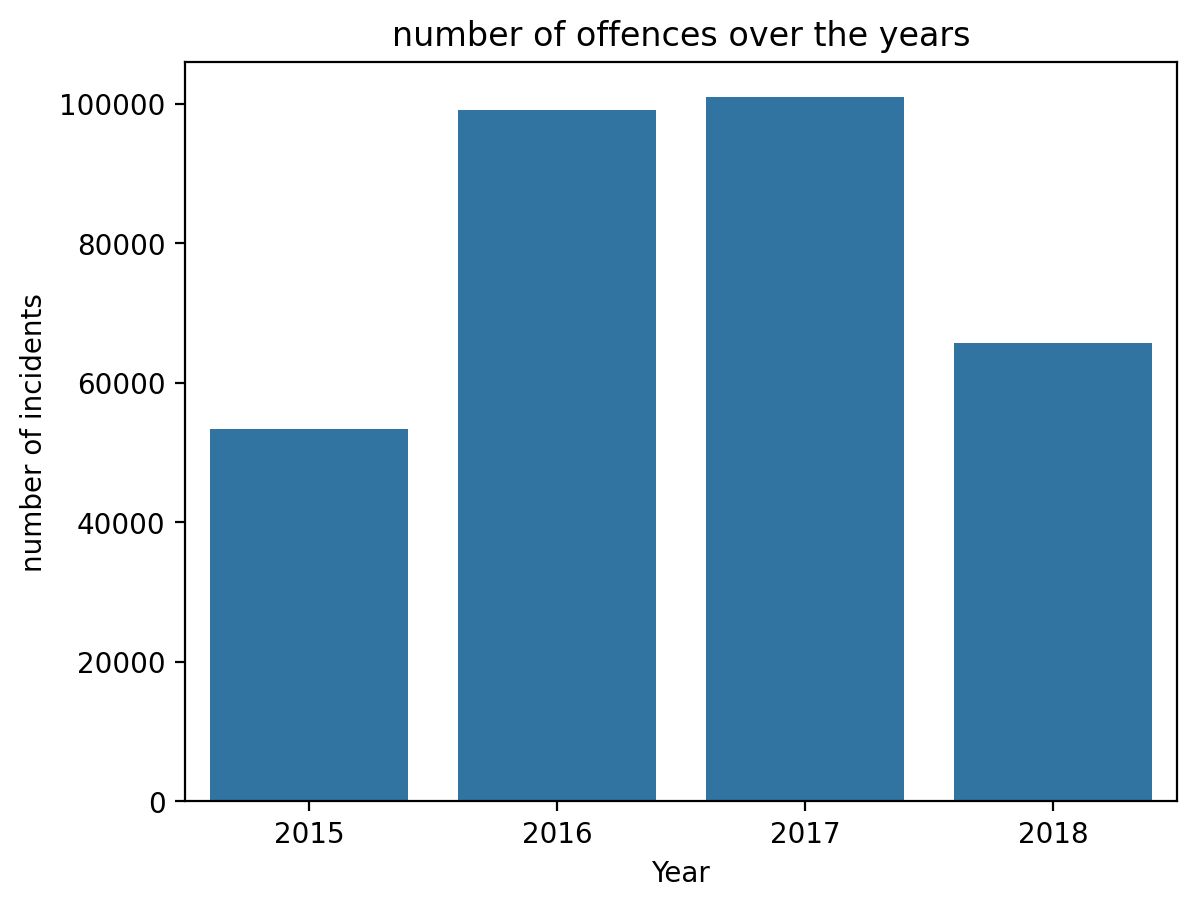

In [ ]:
# Answer / Code / etc
q1 = df[["YEAR", "INCIDENT_NUMBER"]].groupby("YEAR").count()
q1.columns = ["number_of_incidents"]

sns.barplot(data = q1, x=q1.index, y=q1.number_of_incidents)
plt.title("number of offences over the years")
plt.xlabel("year")
plt.ylabel("number of incidents")

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h3>a) Which offences are the most frequent?</h3>

</div>

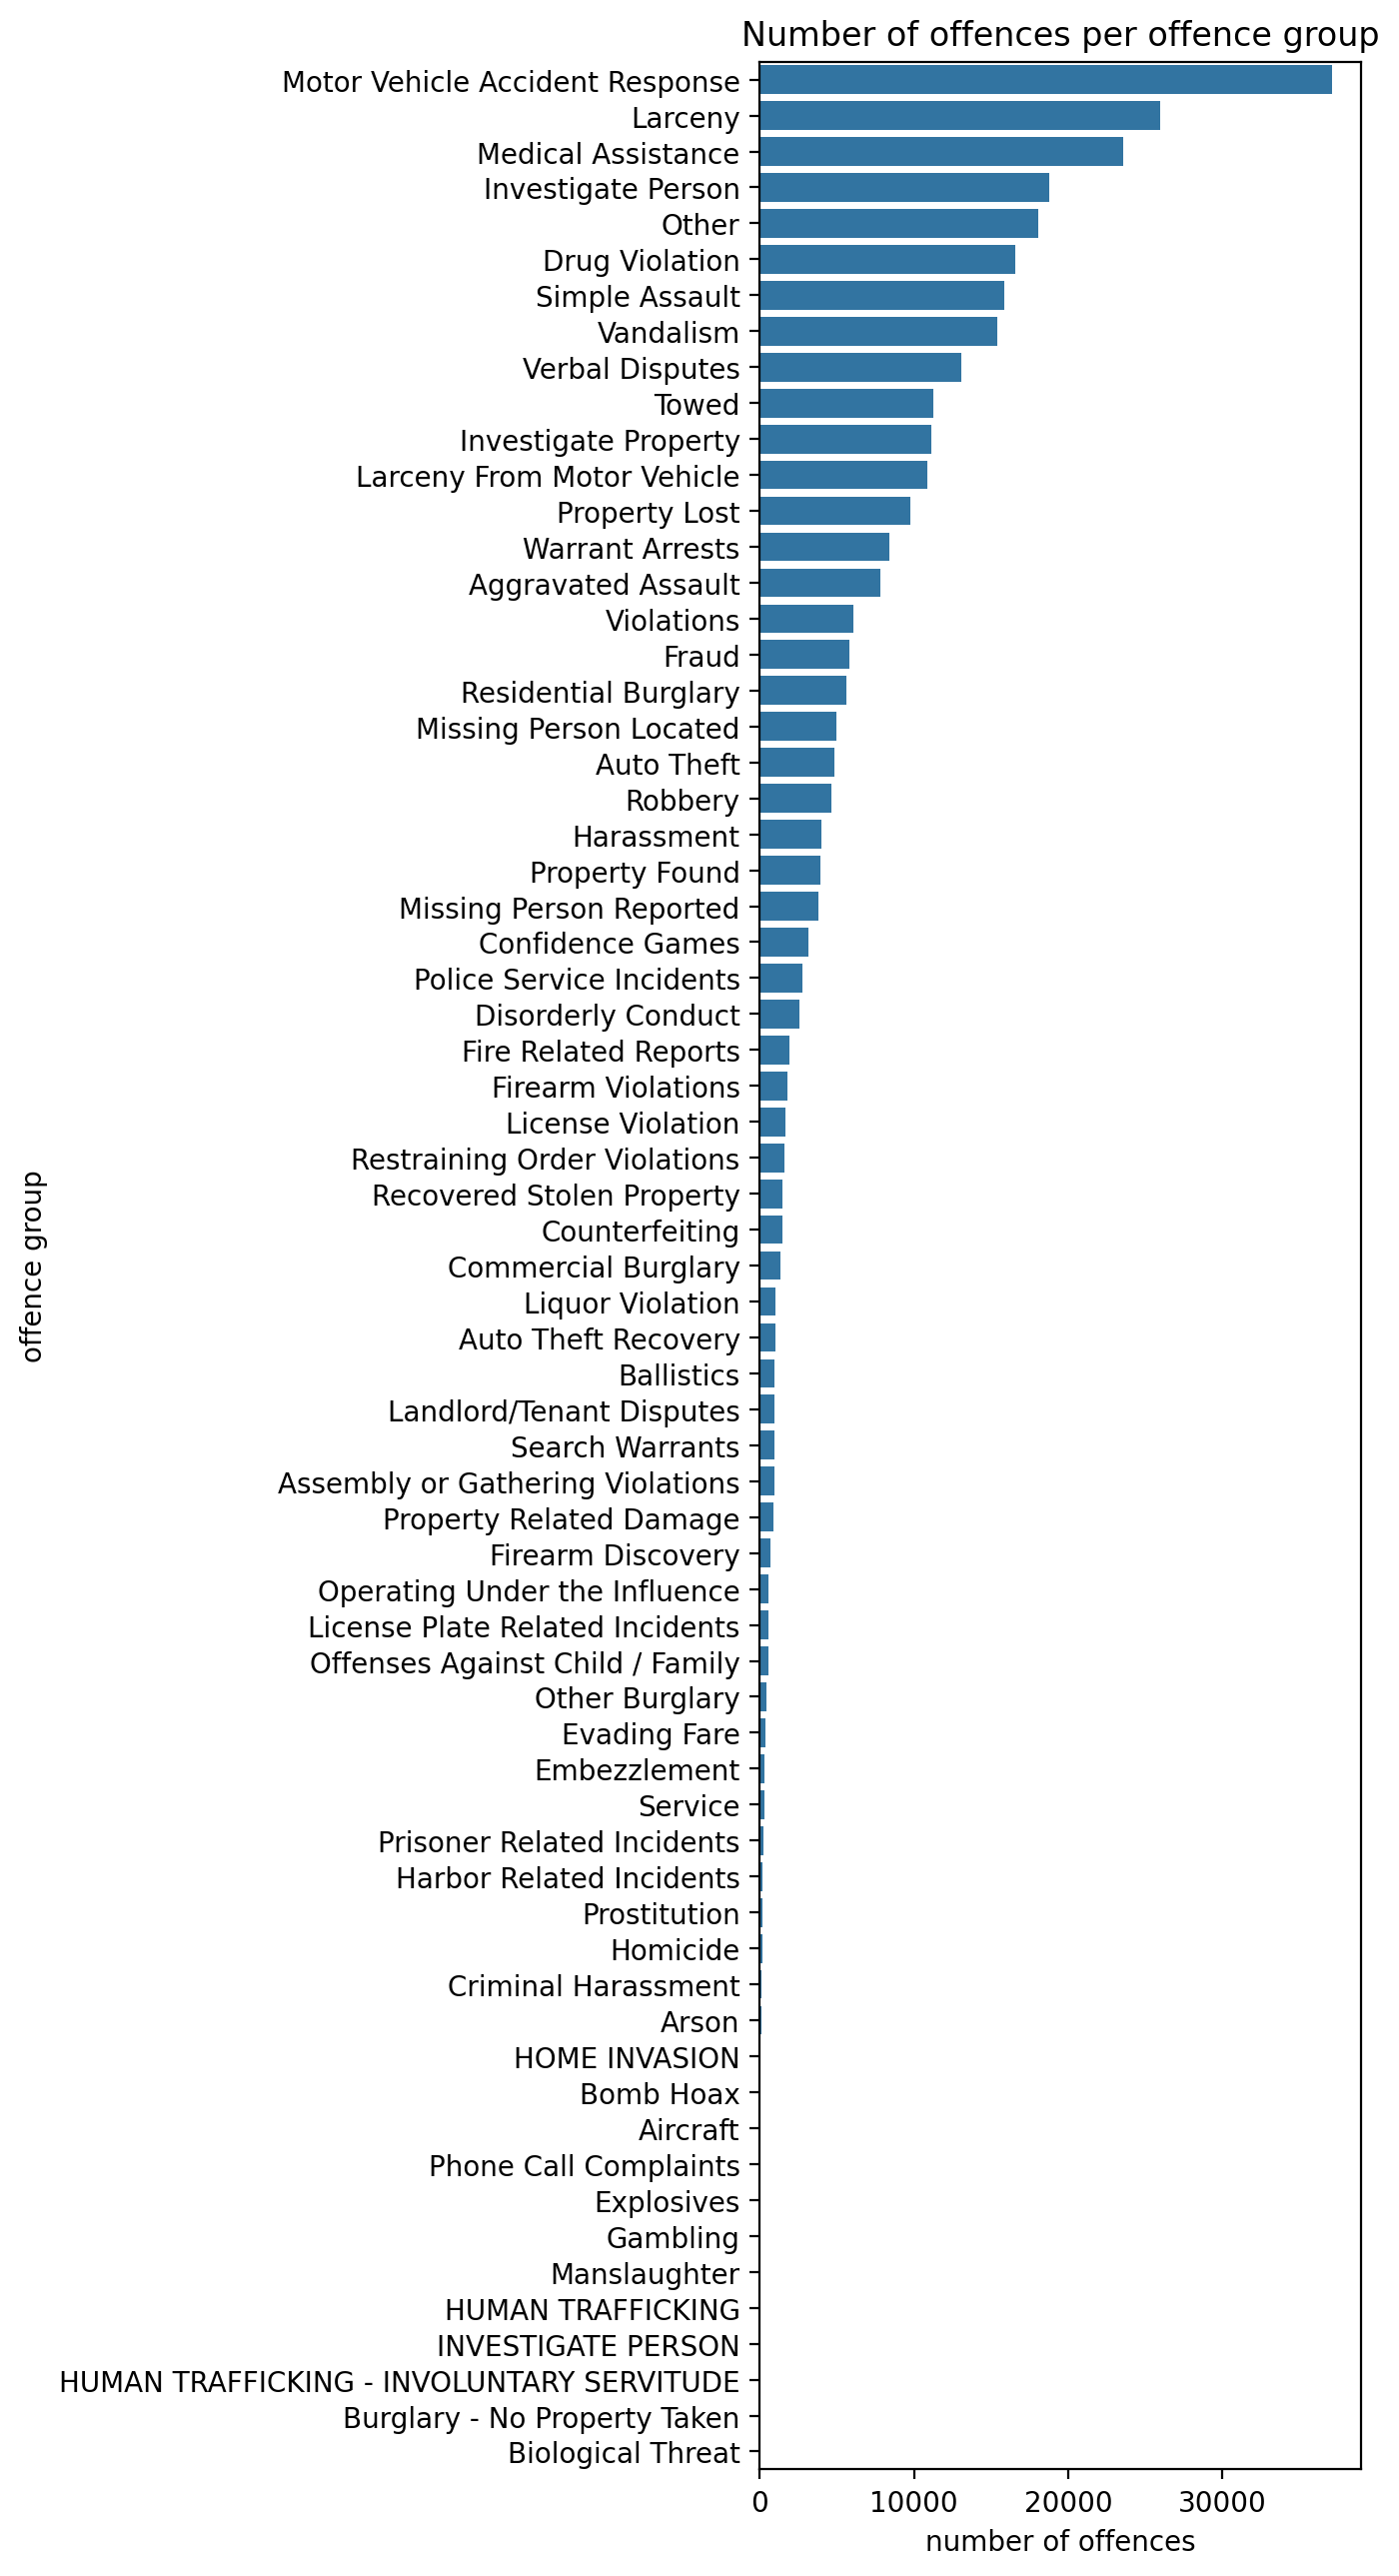

In [56]:
# Answer / Code / etc
q2 = df[["INCIDENT_NUMBER", "OFFENSE_CODE_GROUP"]].groupby("OFFENSE_CODE_GROUP").count()
q2.columns = ["number_of_incidents"]
q2 = q2.sort_values("number_of_incidents", ascending=False)

fig, ax = plt.subplots(figsize = (7,13))
ax = sns.barplot(data = q2, y=q2.index, x=q2.number_of_incidents, ax = ax)
# plt.xticks(rotation = 90)
plt.title("Number of offences per offence group")
plt.ylabel("offence group")
plt.xlabel("number of offences")
plt.tight_layout()
plt.show()

# q2

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h3>b) How has the number of serious crimes ('Part One') developed over the years?</h3>

</div>

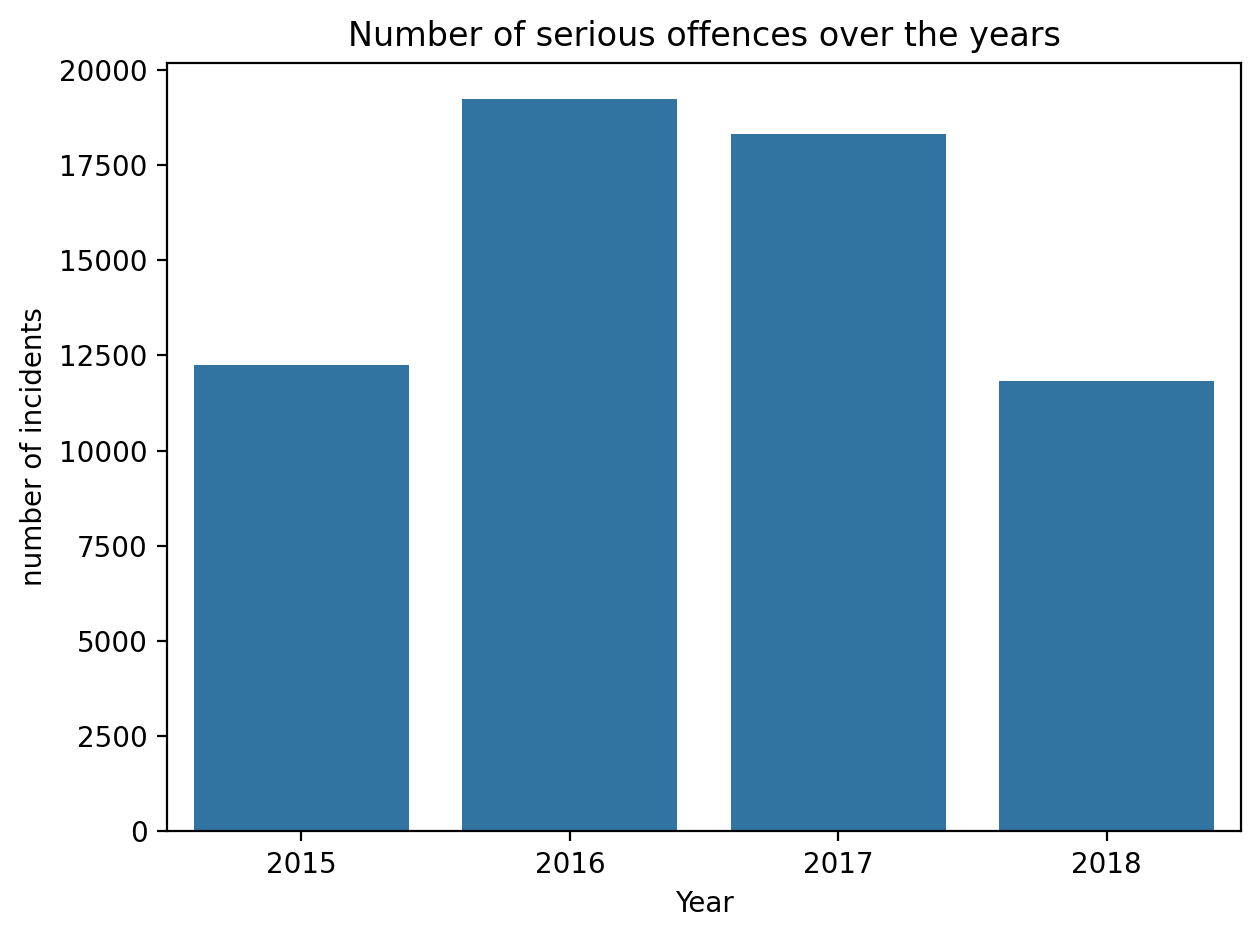

In [59]:
# Answer / Code / etc
q3=df[df["UCR_PART"] == "Part One"][["YEAR", "INCIDENT_NUMBER"]].groupby("YEAR").count()
q3.columns = ["number_of_incidents"]
sns.barplot(x=q3.index, y=q3["number_of_incidents"])
plt.title("Number of serious offences over the years")
plt.xlabel("Year")
plt.ylabel("number of incidents")
plt.tight_layout();

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3>c) Why is the total number of offences (so) low in 2015 and 2018?</h3>
    
</div>

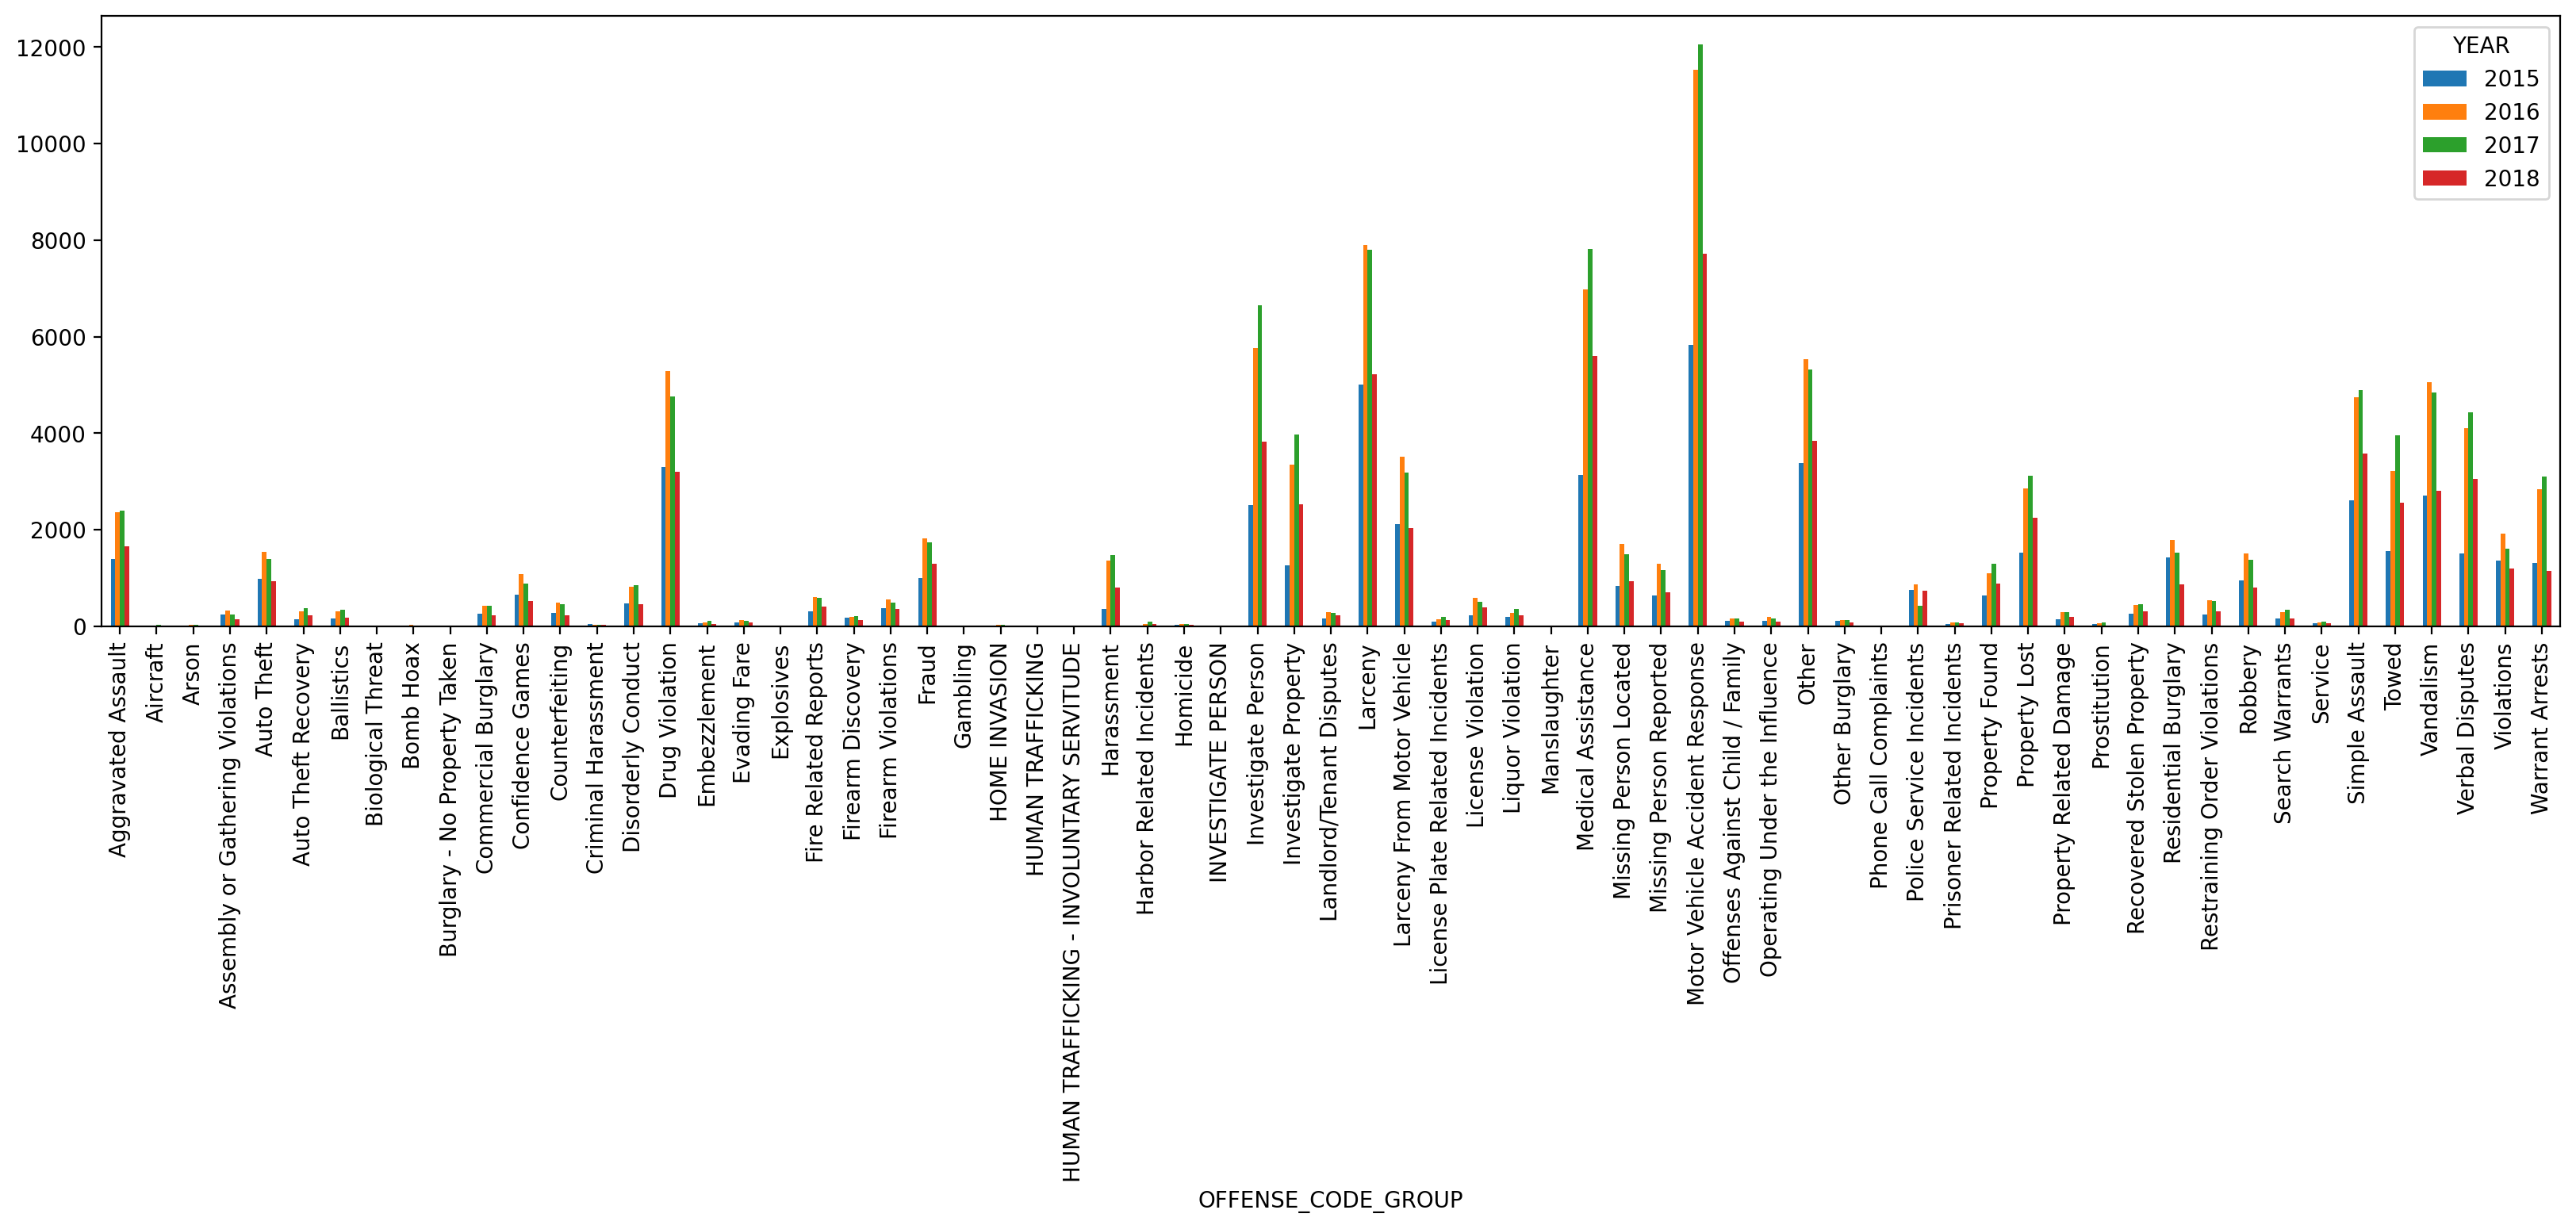

In [ ]:
# Answer / Code / etc
# df[["YEAR", "OFFENSE_CODE_GROUP", "INCIDENT_NUMBER"]].groupby(["OFFENSE_CODE_GROUP", "YEAR"]).count().sort_values(["YEAR", "INCIDENT_NUMBER"], ascending=[True, False])
q4 = pd.pivot_table(df, values = "INCIDENT_NUMBER", columns="YEAR", index="OFFENSE_CODE_GROUP", aggfunc = "count")
q4.plot(kind="bar", figsize=(20, 5))
plt.xticks(rotation = 90);

"""
I dont know.
Who says its low? we only have 4 data-points. 
Thats not enough data to suggest that 50% of the values are high and the others are low.
It could just be normal fluxuation without any real cause

This diagram shows that there is no specific crimes that 2015 and 2018 had a general decrease in crimes throuout most categoriers. 
Without more domain knowledge about the events in boston between 2015 and 2018 its very hard to prove the reason if there is any

"""




<hr/> 

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h1>Key Question 2:</h1>

<h2>In which urban areas (district), broken down by year, were most crimes committed?</h2>
    
</div>

<Axes: xlabel='YEAR,DISTRICT'>

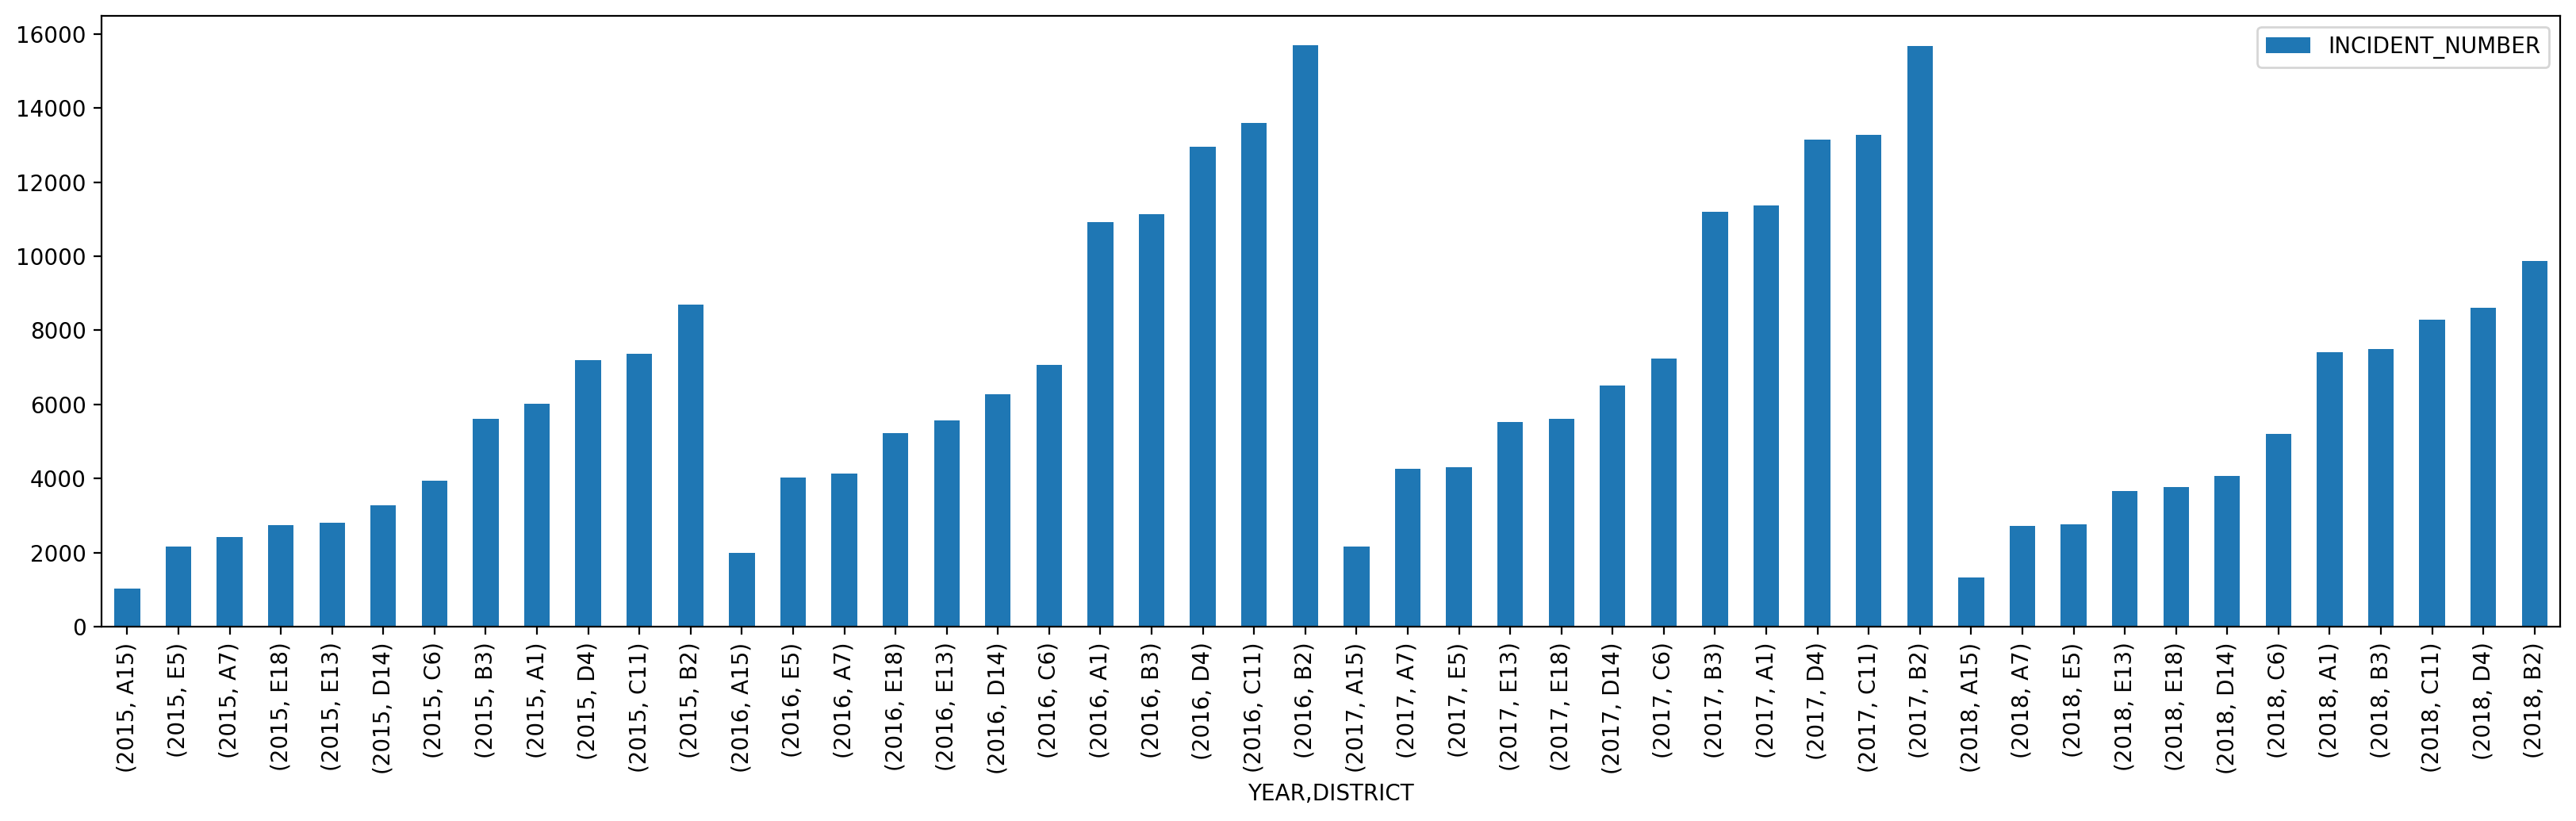

In [125]:
# Answer / Code / et
q5 = df[["INCIDENT_NUMBER", "DISTRICT", "YEAR"]].groupby(["YEAR", "DISTRICT"]).count().sort_values(["YEAR", "INCIDENT_NUMBER"], ascending=[True, True])
q5.plot(kind = "bar", figsize=(20, 5))


<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3> a) In which urban areas (district) are most serious crimes ('Part One') committed? </h3>
    
</div>

<Axes: xlabel='YEAR,DISTRICT'>

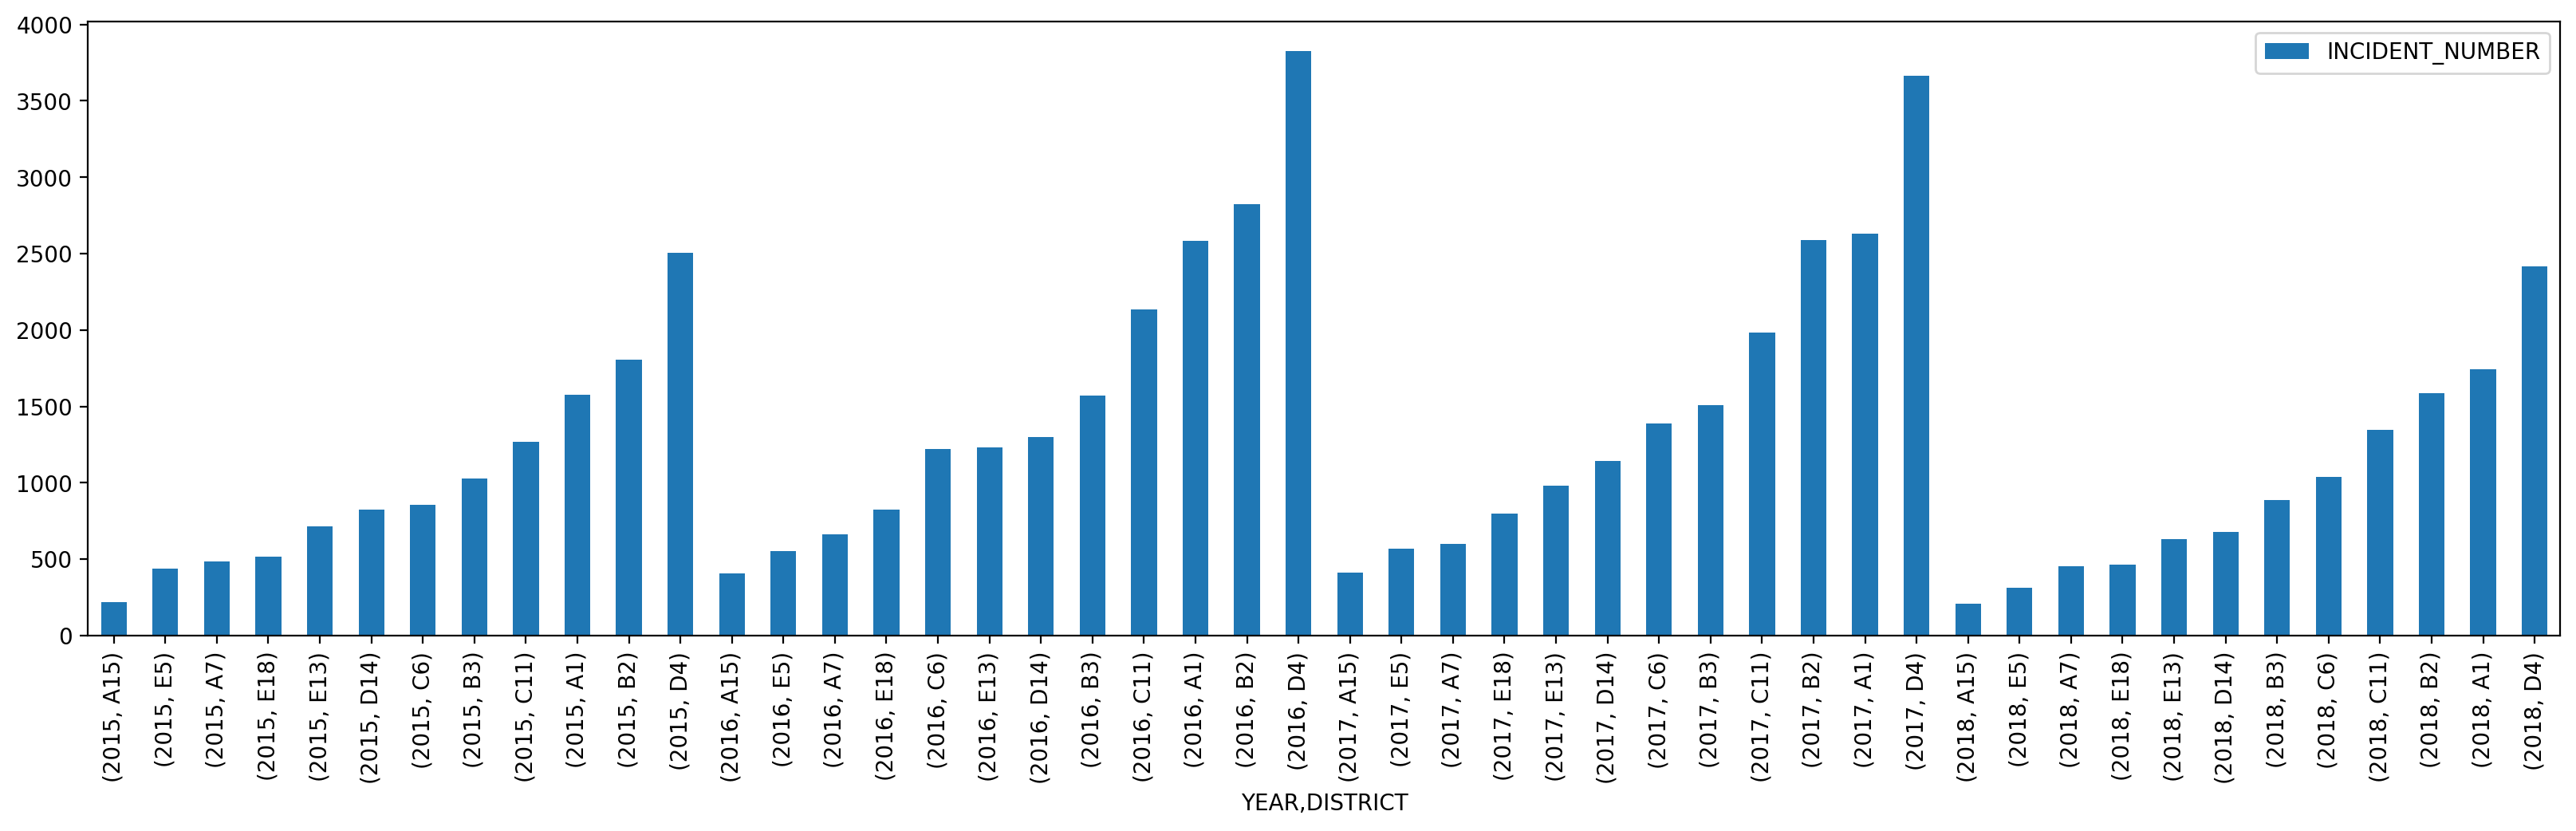

In [128]:
# Answer / Code / etc
q6 = df[df.UCR_PART == "Part One"]
q6 = q6[["INCIDENT_NUMBER", "DISTRICT", "YEAR"]].groupby(["YEAR", "DISTRICT"]).count().sort_values(["YEAR", "INCIDENT_NUMBER"], ascending=[True, True])
q6.plot(kind = "bar", figsize=(20, 5))

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3> b) Which types of serious crimes ('Part One') occur most frequently in the urban area 'B2'? </h3>
    

</div>

                                 INCIDENT_NUMBER
OFFENSE_CODE_GROUP                              
Motor Vehicle Accident Response             6407
Medical Assistance                          3353
Other                                       3325
Verbal Disputes                             3008
Larceny                                     2871
...                                          ...
Explosives                                     6
Harbor Related Incidents                       1
Gambling                                       1
Phone Call Complaints                          1
Manslaughter                                   1

[61 rows x 1 columns]


array([<Axes: ylabel='INCIDENT_NUMBER'>], dtype=object)

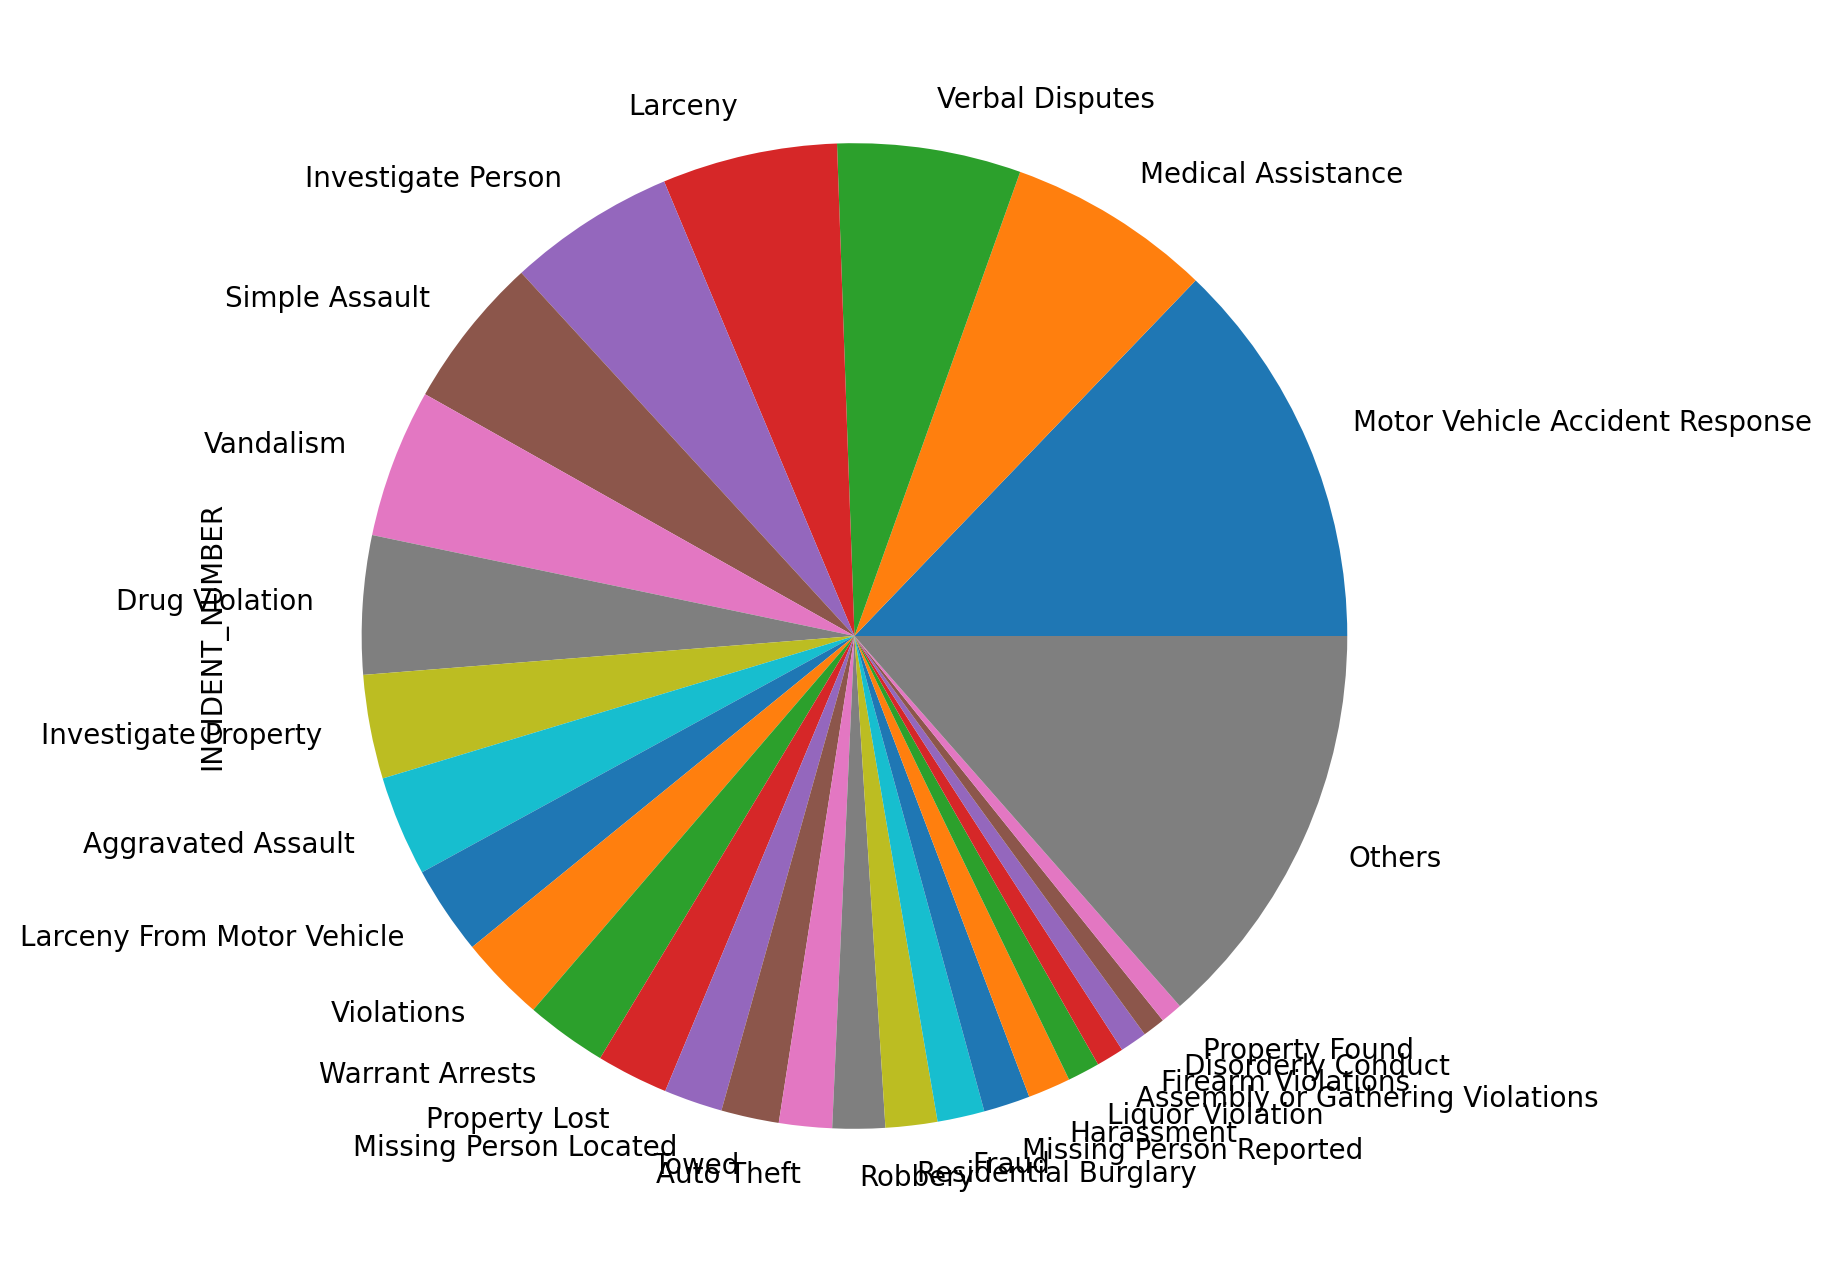

In [180]:
# Answer / Code / etc
q7 = df[df.DISTRICT == "B2"]
q7 = q7[["INCIDENT_NUMBER", "OFFENSE_CODE_GROUP"]].groupby("OFFENSE_CODE_GROUP").count().sort_values("INCIDENT_NUMBER", ascending = False)
print(q7)
small_categories = q7[(q7.INCIDENT_NUMBER < 0.05 * q7.INCIDENT_NUMBER.max()) | (q7.index == "Other")].index
collapsed = q7.copy()
collapsed.loc["Others"] = collapsed.loc[small_categories].sum()
collapsed = collapsed.drop(index=small_categories)

collapsed.plot(kind = "pie", subplots = True, figsize=(20,8), legend = False)

<hr/>

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h1>Key Question 3:</h1>

<h2>Are there (a) times, (b) days or (c) months when more serious crimes ('Part One') occur?</h2>
    
</div>

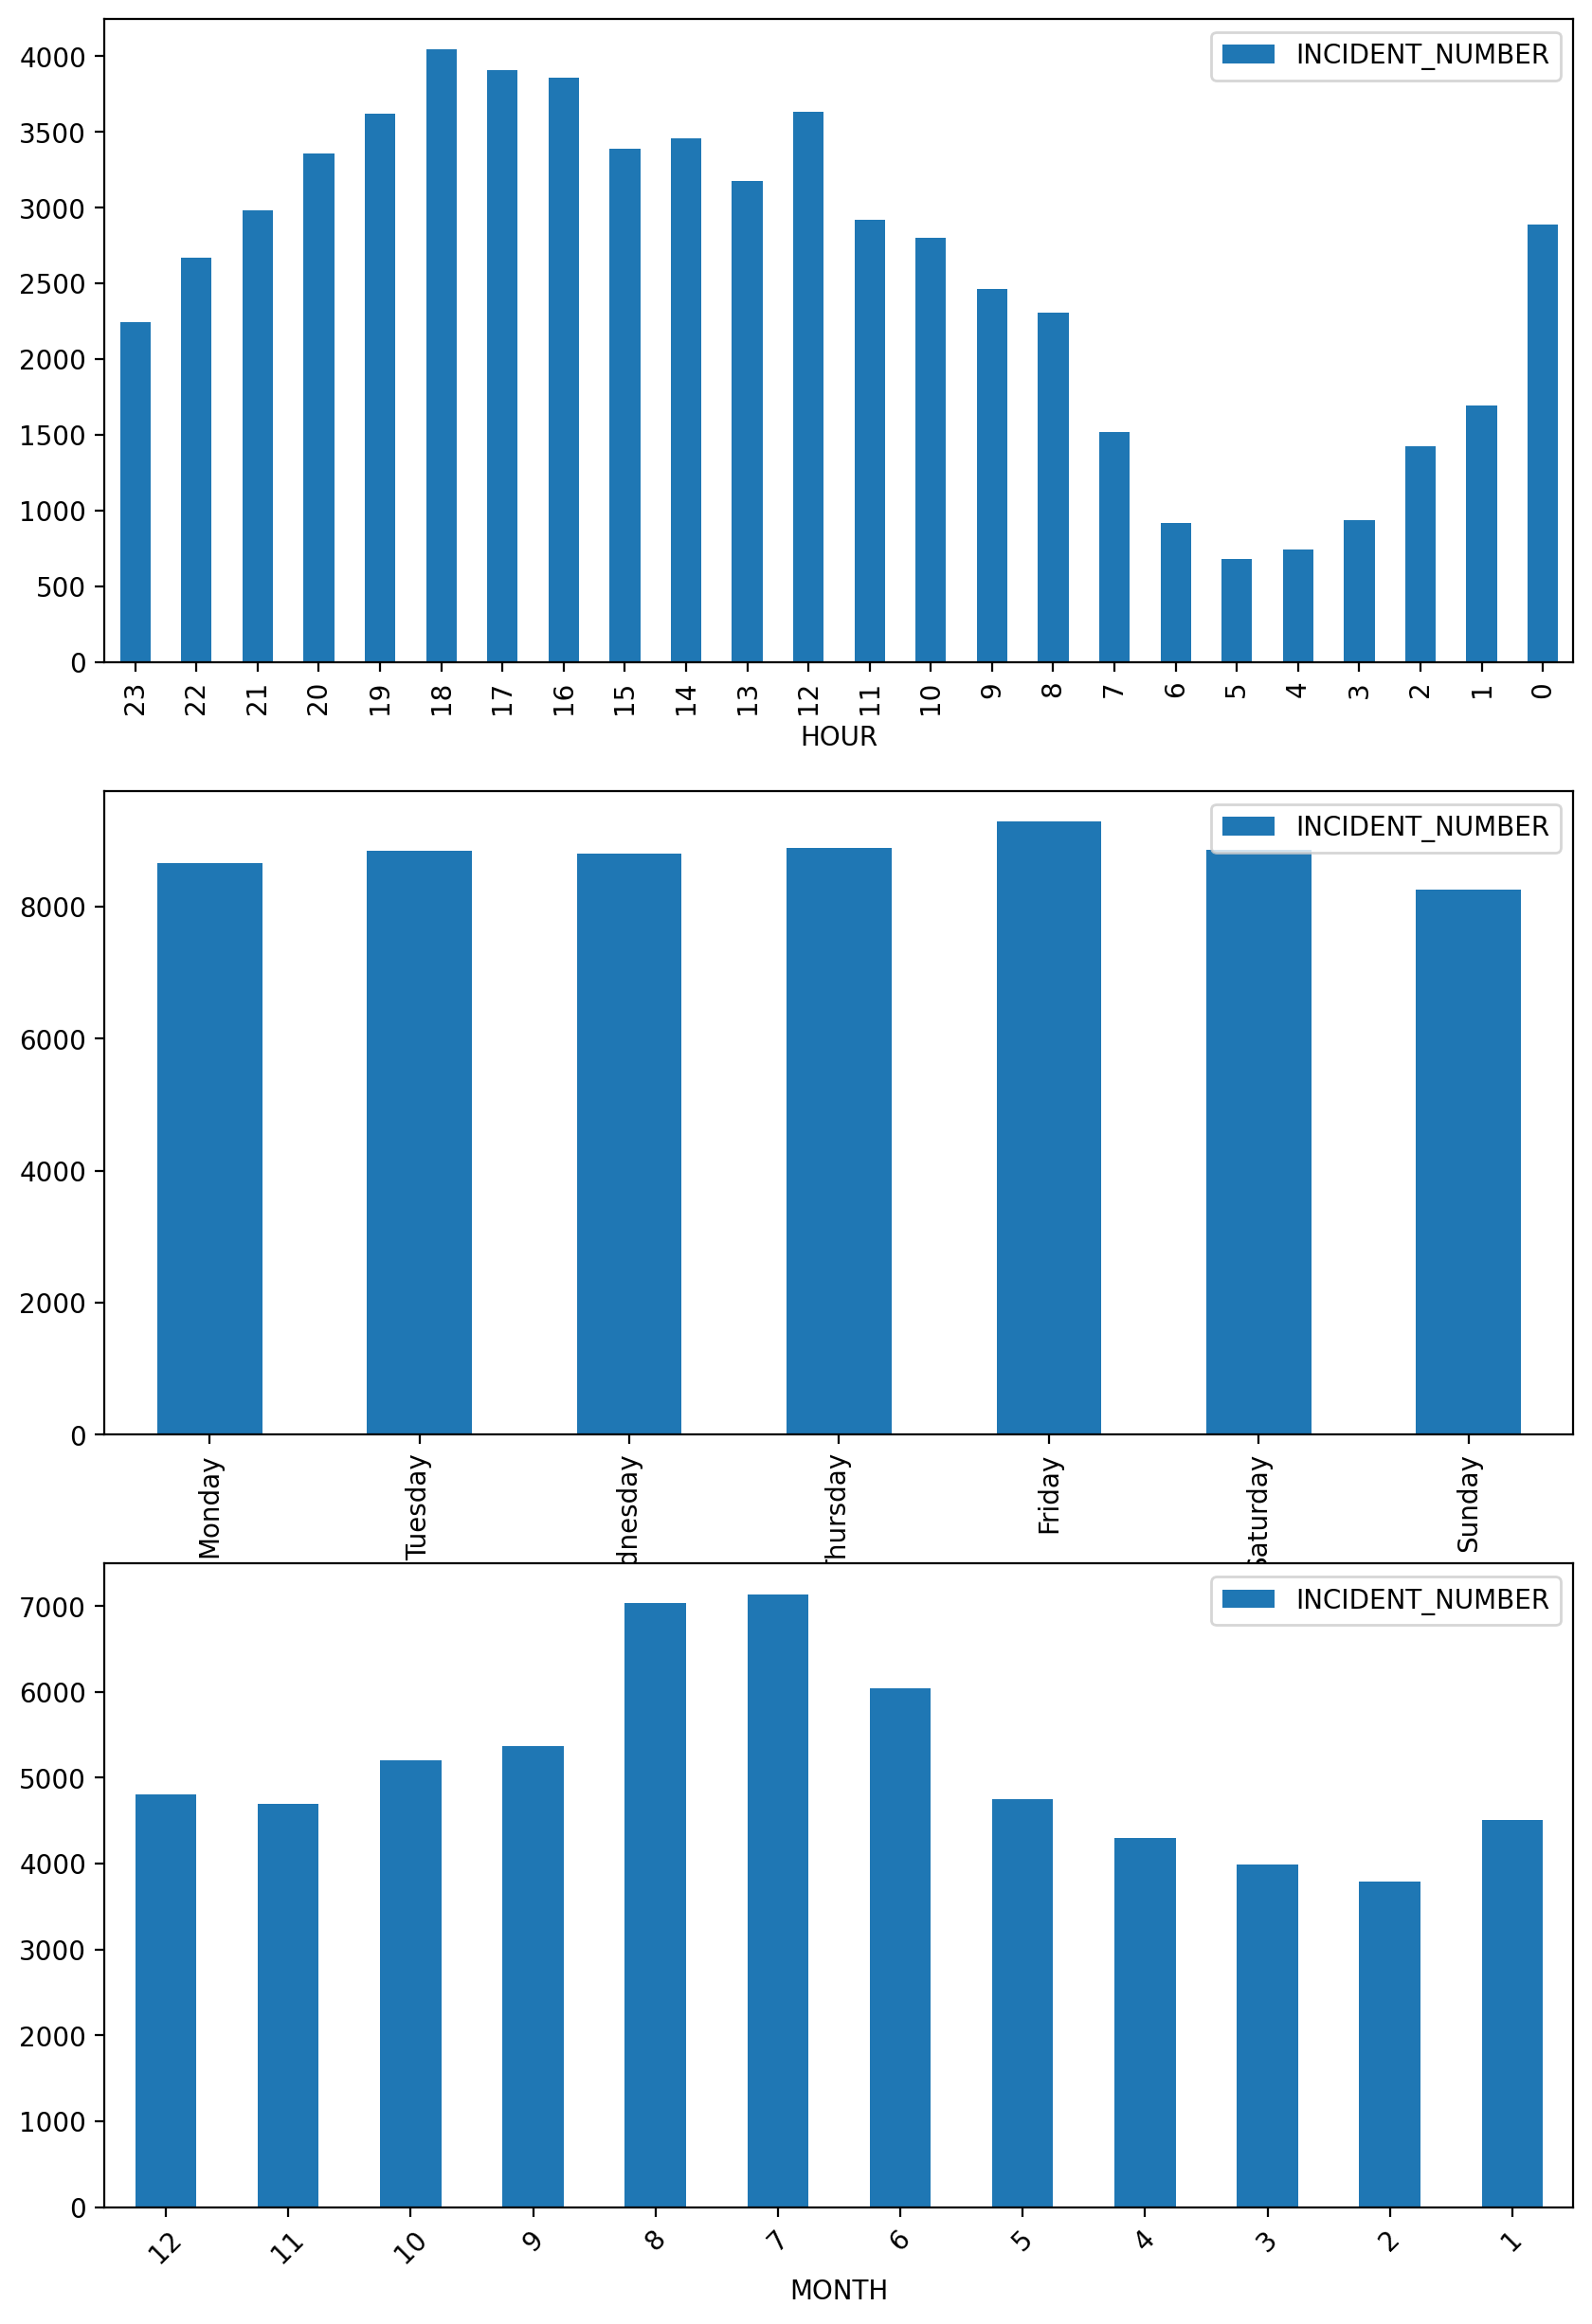

In [ ]:
# Answer / Code / etc
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
q8 = df[df.UCR_PART == "Part One"]
q8_d = q8[["DAY_OF_WEEK", "INCIDENT_NUMBER"]].groupby("DAY_OF_WEEK").count().reindex(days)
q8_m = q8[["MONTH", "INCIDENT_NUMBER"]].groupby("MONTH").count().sort_values("MONTH", ascending=False)
q8_h = q8[["HOUR", "INCIDENT_NUMBER"]].groupby("HOUR").count().sort_values("HOUR", ascending=False)


fig, axs = plt.subplots( 3,1 , figsize=(10,15))
q8_h.plot(kind = "bar", ax = axs[0])
q8_d.plot(kind = "bar", ax = axs[1])
q8_m.plot(kind = "bar", ax = axs[2])
plt.xticks(rotation = 45)

plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h3> a) Do crimes tend to occur at night or during the day?</h3>
    
</div>

In [ ]:
# Answer / Code / etc
"""
    most crimes happen between 12 and 8 pm and the least amount of crimes happen around 2am to 7am
    So most crmies happen during the day/afternoon
"""

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h3> b) When are the most police officers needed?</h3>
    
</div>

In [ ]:
# Answer / Code / etc
""" 
most crimes happen at 6pm no matter the day of the week. however July and augist have the most cromes so most police offices are needed at 6pm in July and August
"""

<hr/>

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h1>Key Question 4:</h1>

<h2>How has the number of shootings developed in recent years?</h2>
    
</div>

<Axes: xlabel='YEAR'>

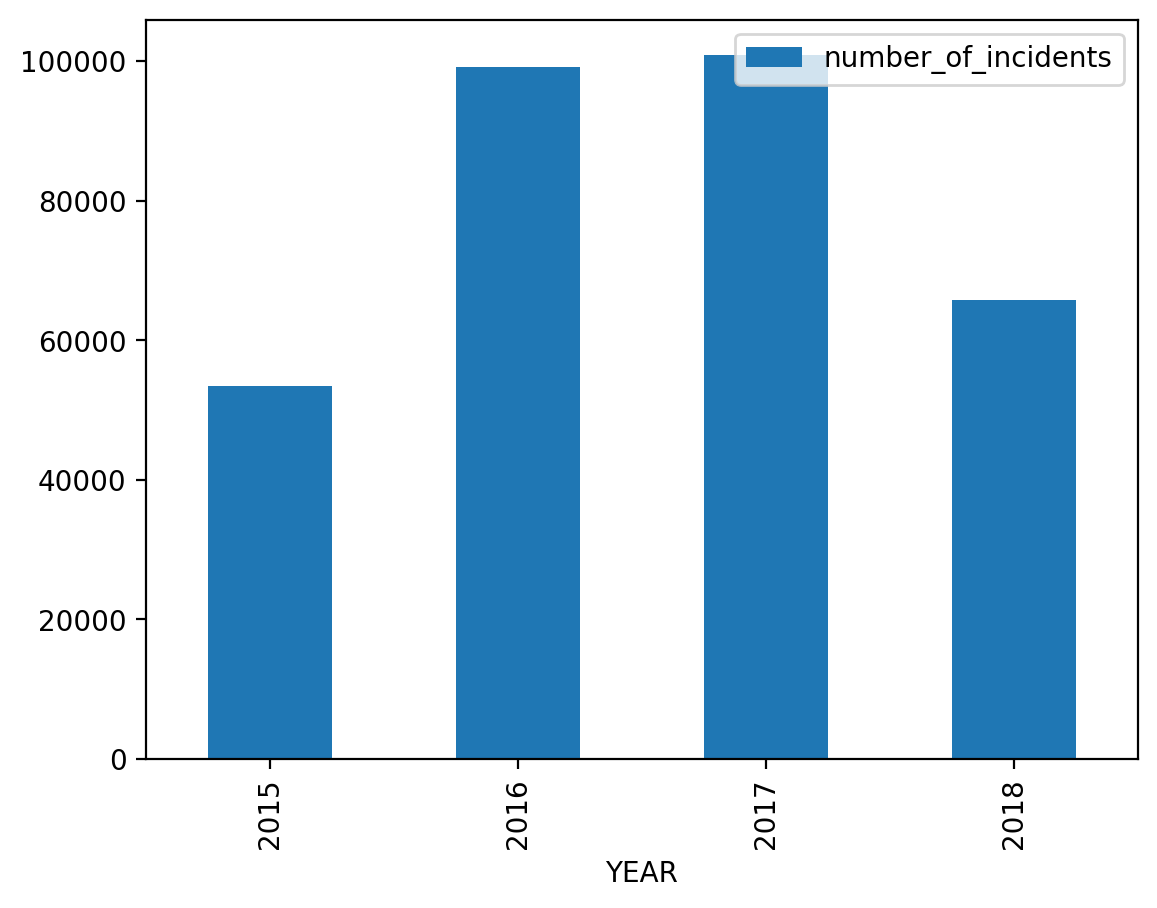

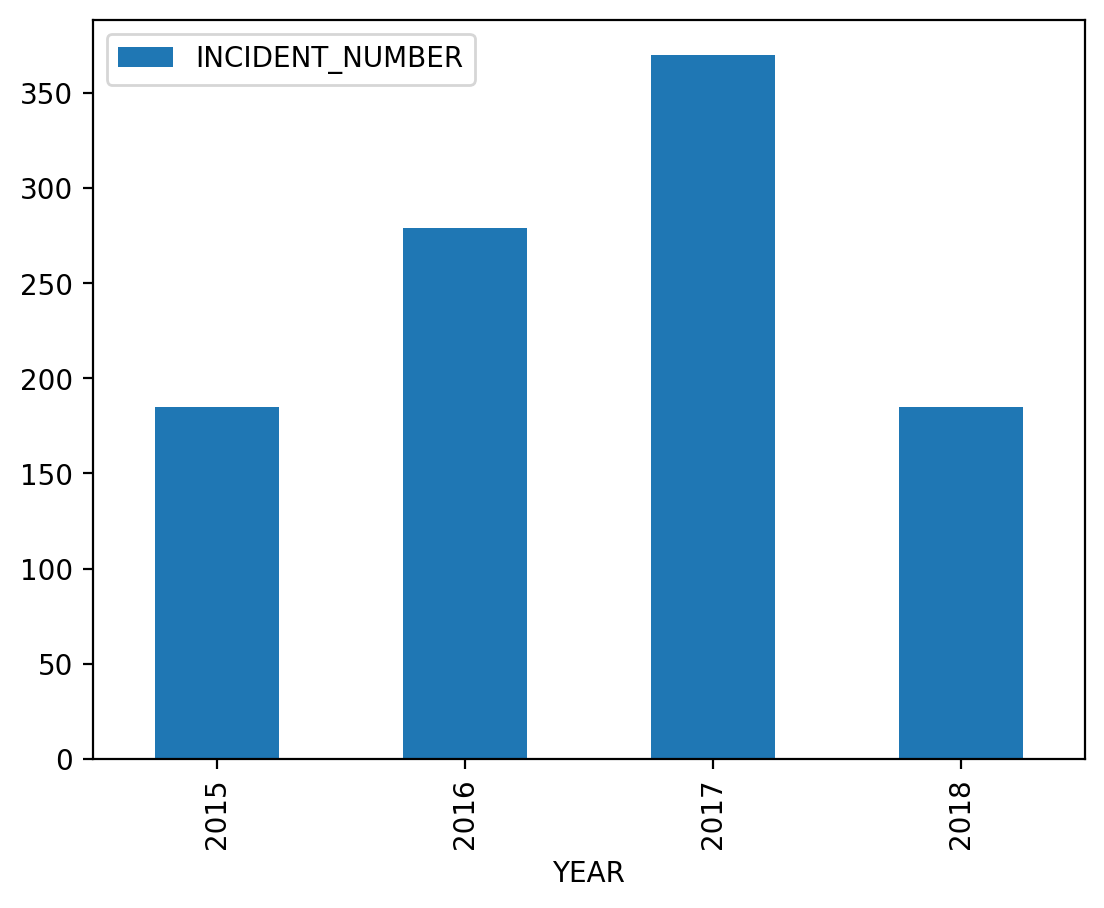

In [ ]:
# Answer / Code / etc
q9 = df[df.SHOOTING == "Y"][["YEAR", "INCIDENT_NUMBER"]]
q9 = q9.groupby("YEAR").count()

q1.plot(kind = "bar")
q9.plot(kind = "bar")

# --> shootings mostly correlate to number of crimes --> shootings just developed the same as normal crime rate
# only in 2016 was the increase in shootings lower than the increase in general crimes --> 2016 lower rate of shootings than normal

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3> a) In which district do most shootings take place?</h3>
    
</div>

0.7394296951819076


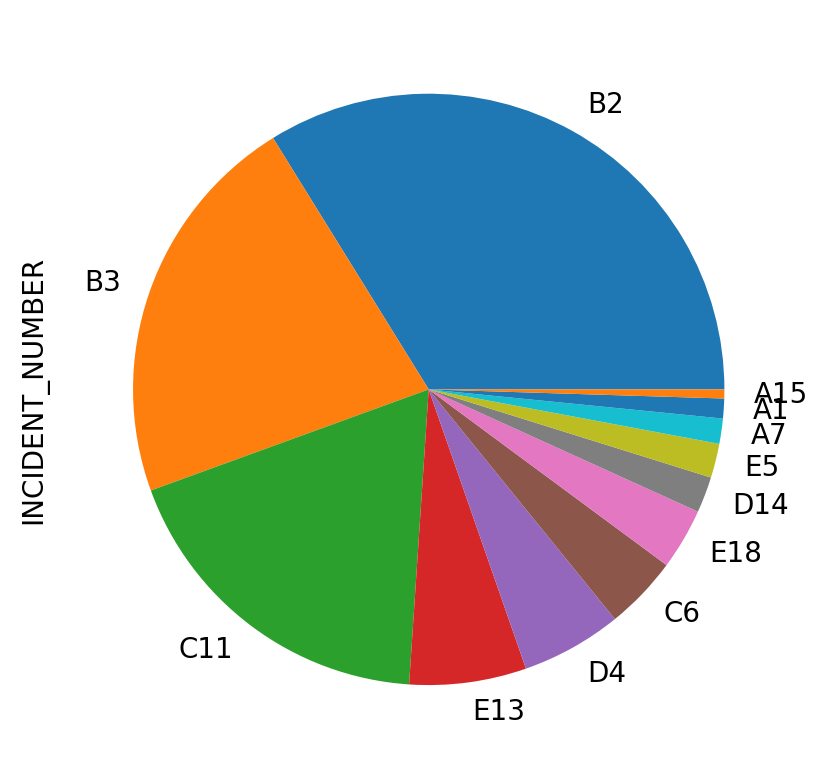

In [ ]:
# Answer / Code / etc
q10 = df[df.SHOOTING == "Y"][["DISTRICT", "INCIDENT_NUMBER"]]
q10 = q10.groupby("DISTRICT").count().sort_values("INCIDENT_NUMBER", ascending = False)
q10.plot(kind = "pie", subplots=True, legend = False)
q10 =q10.reset_index()
print((q10[(q10["DISTRICT"] == "B2")].values[0][1]+ q10[(q10["DISTRICT"] == "B3")].values[0][1] + q10[(q10["DISTRICT"] == "C11")].values[0][1]) / q10["INCIDENT_NUMBER"].sum())

#the vast majority of crimes with over 70% happen in the districts B2, B3 and C11

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3>b) In which street do most shootings take place?</h3>
    
</div>

<Axes: xlabel='STREET'>

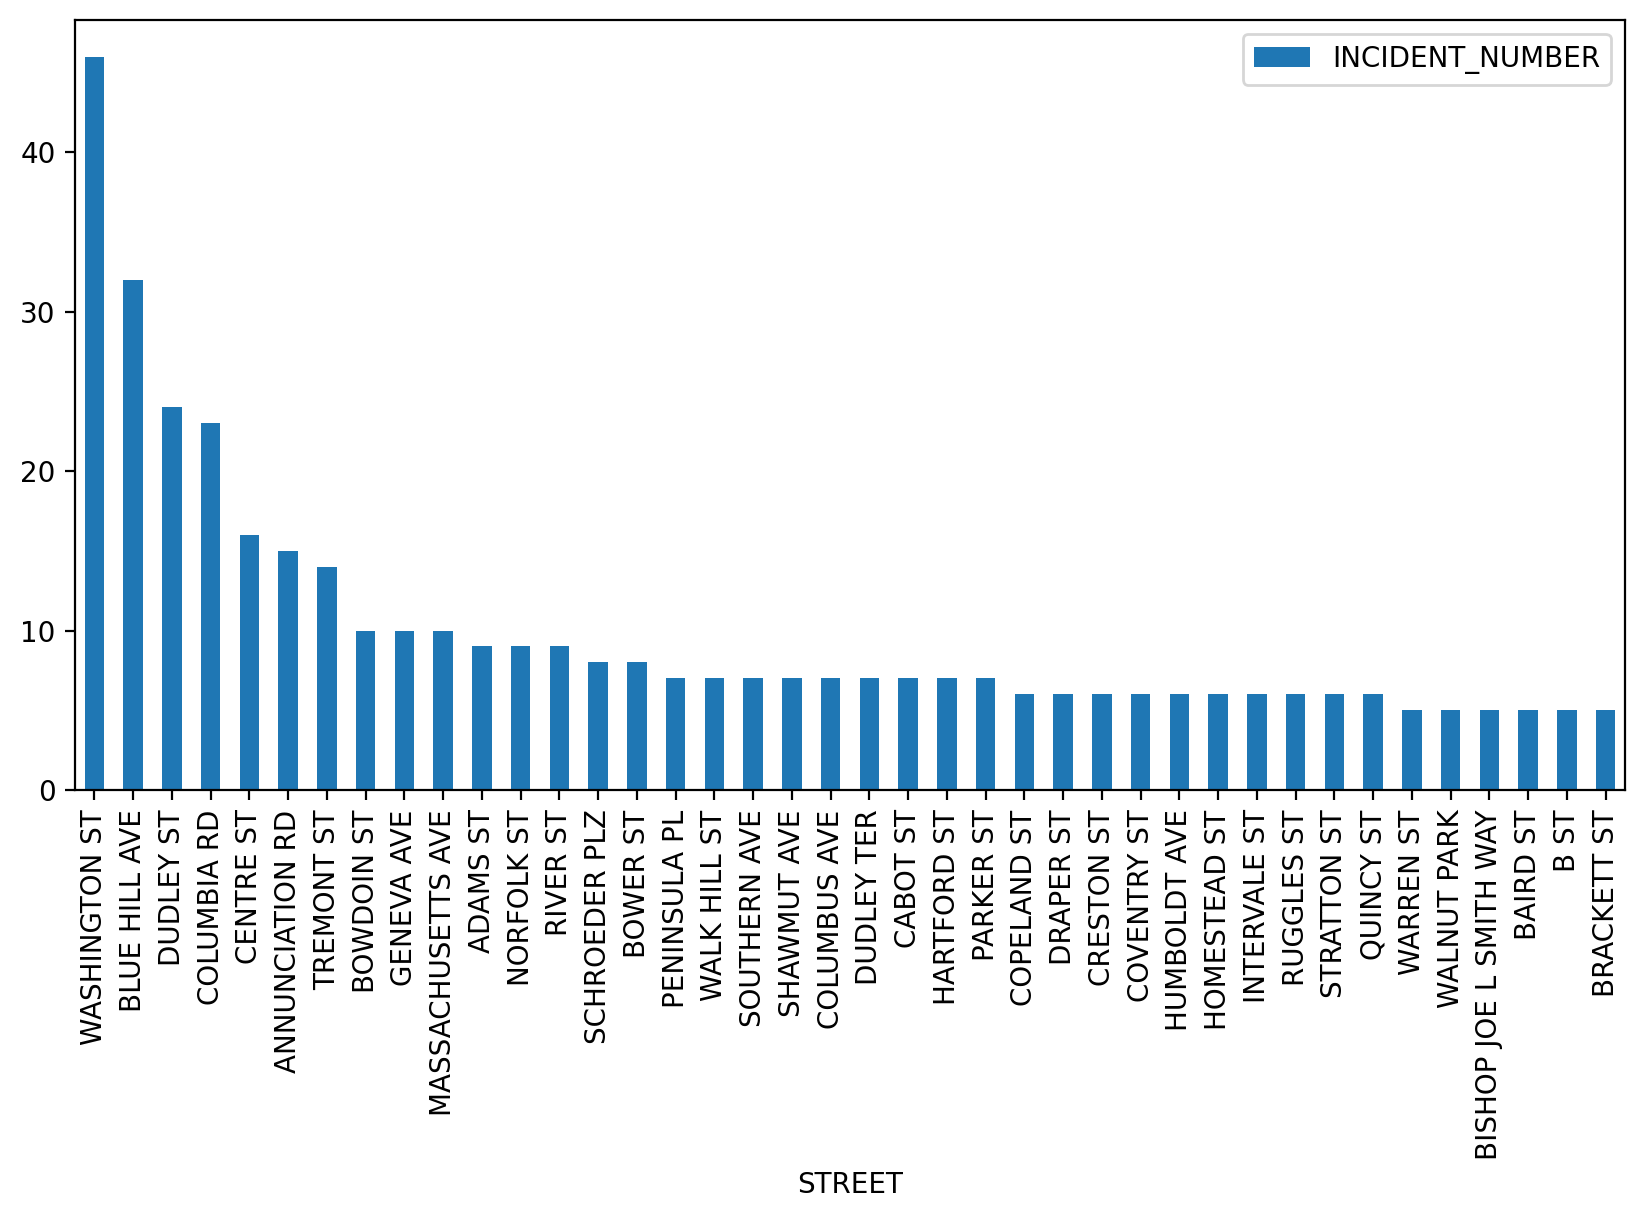

In [ ]:
# Answer / Code / etc

q11 = df[df.SHOOTING == "Y"][["STREET", "INCIDENT_NUMBER"]]
q11 = q11.groupby("STREET").count().sort_values("INCIDENT_NUMBER", ascending = False)[:40]
fig, ax = plt.subplots(figsize=(10,5))
q11.plot(kind = "bar", ax = ax)

#Most crimes happen on Washington Street

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3>c) At what times do most shootings take place?</h3>
    
</div>

<Axes: xlabel='HOUR'>

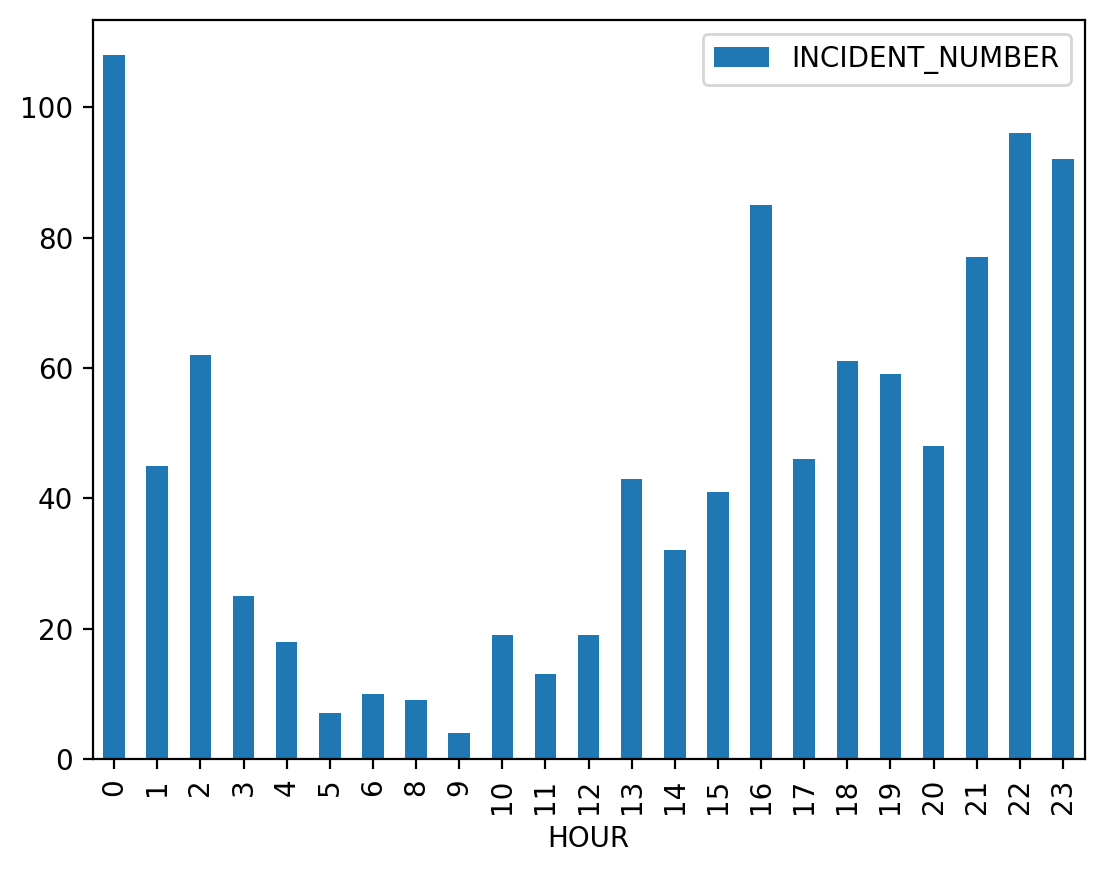

In [ ]:
# Answer / Code / etc
q10 = df[df.SHOOTING == "Y"][["HOUR", "INCIDENT_NUMBER"]]
q10 = q10.groupby("HOUR").count()
q10.plot(kind = "bar")

#Most Shootings take place at night. An outlier is 4pm but otherwise most shootings take place between 9pm and 12am


<hr/>

# Finally: 
From these solutions: 
- **create a report in PPT, Word, html, etc.** 
- list each Key Question and its answers
- show plots, tables, etc to underline your statement

**Code is not enough to answer the key questions. It should be a visualization and explanation.**

**IF and only IF this JupsterNotebook is very clean, you may polish it, add explanations as markdown, and hand it in as a HTML report, instead**